# Statistical Analysis and Visualization  
### May Cooper  

This notebook explores a health insurance dataset containing demographic, behavioral, and medical cost information for 1,338 insured individuals. The objective is to identify key factors influencing healthcare expenses through systematic data analysis and visualization.  

The analysis examines variables such as medical charges, BMI, sex, smoking status, and region to uncover patterns and relationships that impact health costs. Visualizations, including histograms, count plots, scatterplots, and boxplots, are used to present findings clearly and support interpretation.  

The results highlight the influence of lifestyle and regional factors on medical expenses, providing insights that can inform fair insurance pricing and the design of targeted health and wellness initiatives.  

In [ ]:
# Install required libraries if not already installed
import warnings
!pip install pandas numpy matplotlib seaborn scipy
warnings.filterwarnings("ignore")

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency, mannwhitneyu

# Load the dataset
data = pd.read_excel('Health Insurance Dataset.xlsx')

# Inspect dataset
data.head()

,age,sex,bmi,children,smoker,region,charges,Level,score
0,19.0,female,27.900,0.0,yes,southwest,16884.924,B,72.0
1,18.0,male,33.770,1.0,no,southeast,1725.5523,C,69.0
2,28.0,male,33.000,3.0,no,southeast,4449.462,B,90.0
3,33.0,male,22.705,0.0,no,northwest,21984.47061,A,47.0
4,32.0,male,28.880,0.0,no,northwest,3866.8552,C,76.0


In [ ]:
# Checking rows where 'bmi' is not numeric
invalid_rows = data[~data['bmi'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
print(invalid_rows)

      age  sex  bmi  children smoker region  \
1338  NaN  NaN  NaN       NaN    NaN    NaN   
1342  NaN  NaN  NaN       NaN    NaN    225   
1344  NaN  NaN  NaN       NaN    NaN    707   
1345  NaN  NaN  NaN       NaN    NaN    NaN   
1346  NaN  NaN  NaN       NaN    NaN          
1347  NaN  NaN  NaN       NaN    NaN          

                                                charges Level  score  
1338                                                NaN   NaN    NaN  
1342   If your BMI is 18.5 to <25, it falls within t...   NaN    NaN  
1344  If your BMI is 30.0 or higher, it falls within...   NaN    NaN  
1345  Conclusion: Half of all patients are rated as ...   NaN    NaN  
1346                        Half of all patients are...   NaN    NaN  
1347                                                      NaN    NaN  


In [ ]:
# creating a copy of data
data_cleaned = data.copy()

In [51]:
# cleaning data
columns_to_check = ['bmi', 'charges']
data_cleaned = data.dropna(subset=columns_to_check)

In [52]:
# converting to numeric
for col in ['age', 'bmi', 'charges']:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

#### Two Continuous Variables:

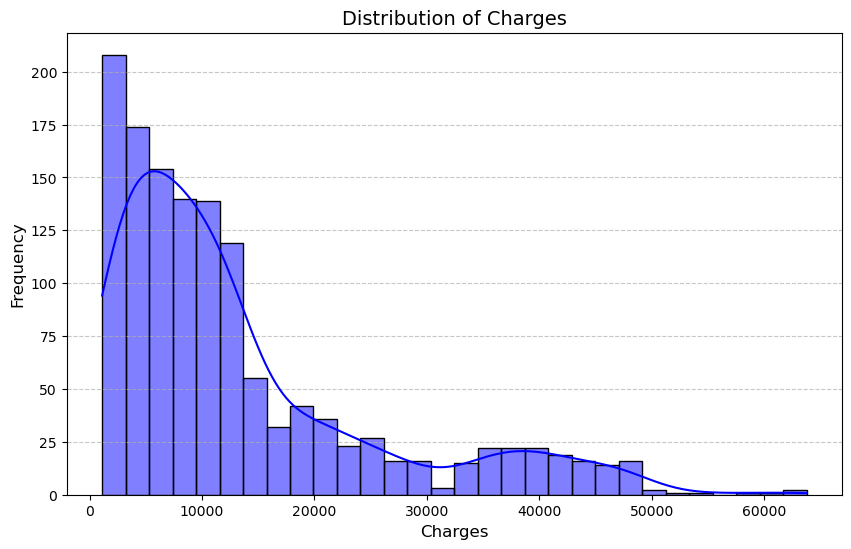

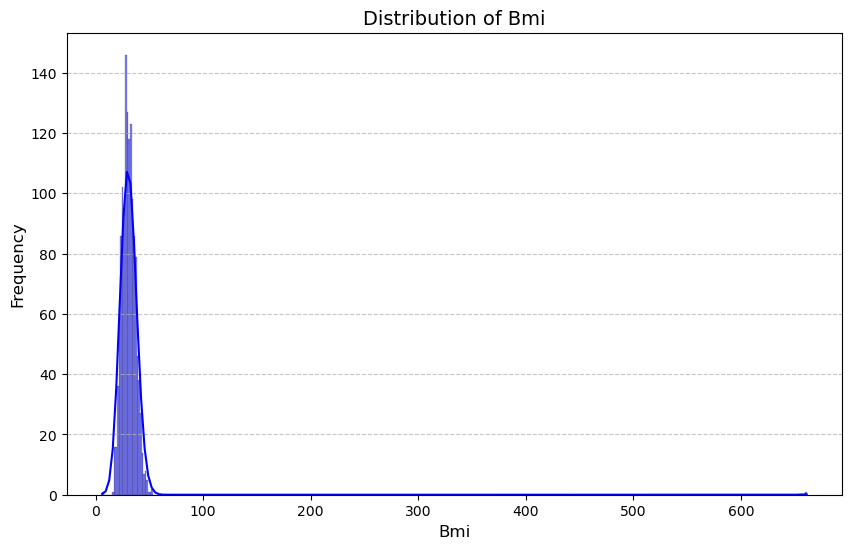

In [53]:
# Plotting distributions for 'charges' and 'bmi' from the cleaned data
continuous_vars = ['charges', 'bmi']

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_cleaned[var], kde=True, color='blue')  # Use 'data_cleaned' instead of 'data'
    plt.title(f'Distribution of {var.capitalize()}', fontsize=14)
    plt.xlabel(var.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [54]:
# Checking for outliers
print(data_cleaned['bmi'].describe())

count    1340.000000
mean       31.115465
std        18.278691
min         6.098187
25%        26.272500
50%        30.400000
75%        34.700000
max       661.000000
Name: bmi, dtype: float64


In [55]:
# Removing unrealistic BMI values
data_cleaned = data_cleaned[data_cleaned['bmi'] <= 60]

# Re-plotting dists

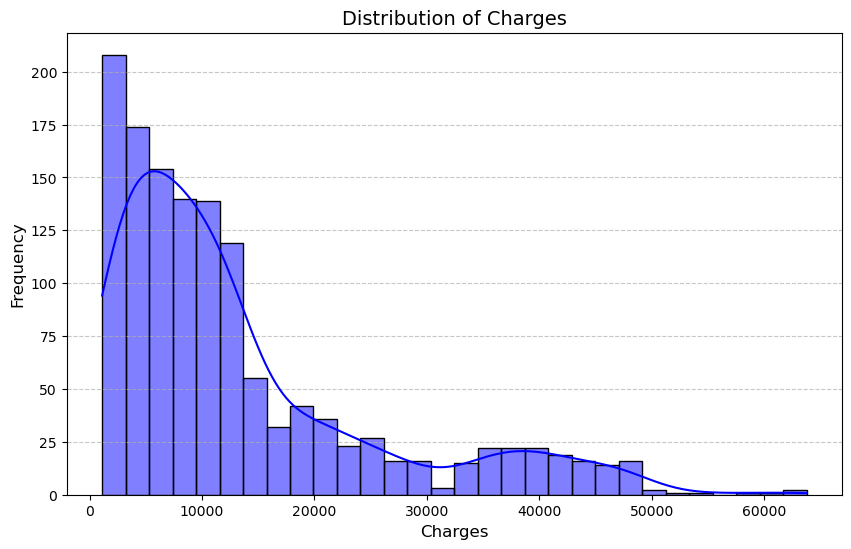

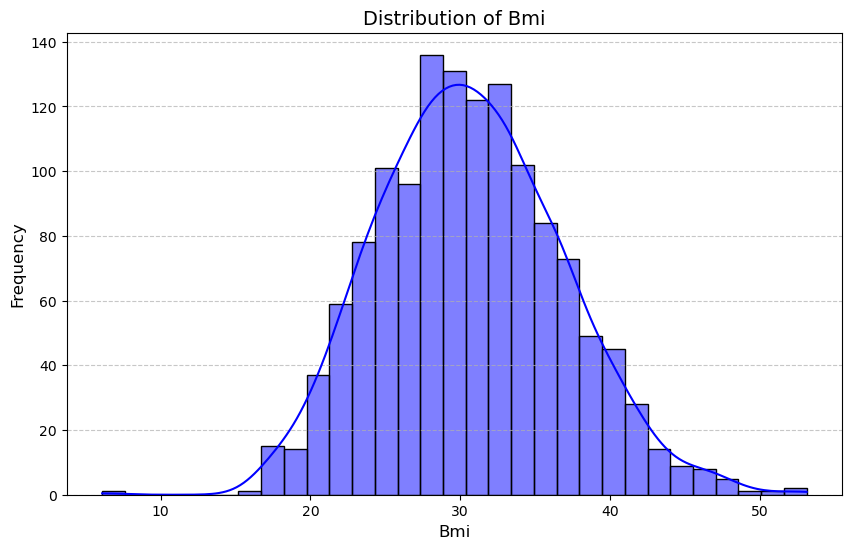

In [56]:
# Re-plotting
continuous_vars = ['charges', 'bmi']

for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_cleaned[var], kde=True, color='blue')  # Use 'data_cleaned' instead of 'data'
    plt.title(f'Distribution of {var.capitalize()}', fontsize=14)
    plt.xlabel(var.capitalize(), fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Univariate Analysis
#### Two Categorical Variables:

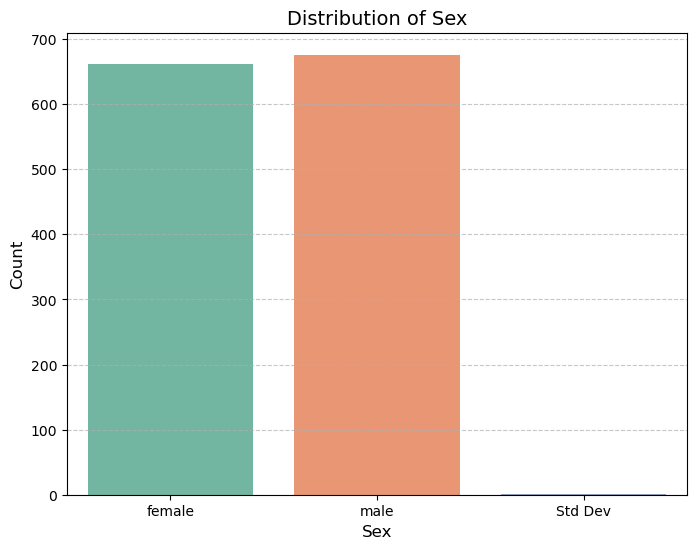

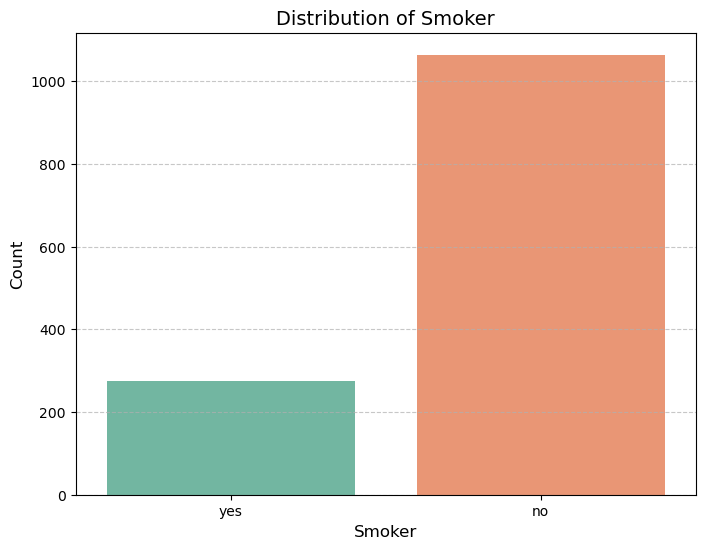

In [57]:
# Looking at distributions for 'sex' and 'smoker' from cleaned data
categorical_vars = ['sex', 'smoker']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data_cleaned, x=var, palette='Set2')  # Use 'data_cleaned' instead of 'data'
    plt.title(f'Distribution of {var.capitalize()}', fontsize=14)
    plt.xlabel(var.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [58]:
# Checking column data to clean out
print(data_cleaned['sex'].unique())

['female' 'male' 'Std Dev']


In [59]:
# Removing invalid cats
valid_categories = ['male', 'female']
data_cleaned = data_cleaned[data_cleaned['sex'].isin(valid_categories)]

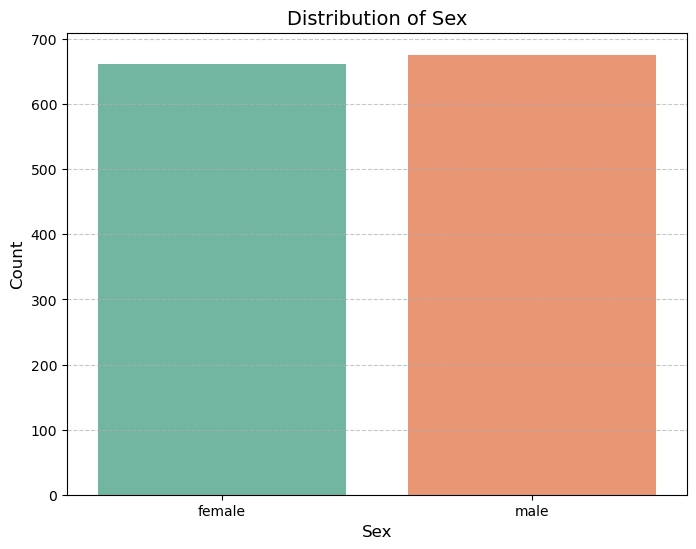

In [60]:
# Re-plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='sex', palette='Set2')
plt.title('Distribution of Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Bivariate Analysis
Pearson correlation quantifies the linear relationship between two continuous variables. Here, we examine the correlation between `bmi` and `charges` to understand if higher BMI values are associated with higher medical charges.
#### Two Continuous Variables:

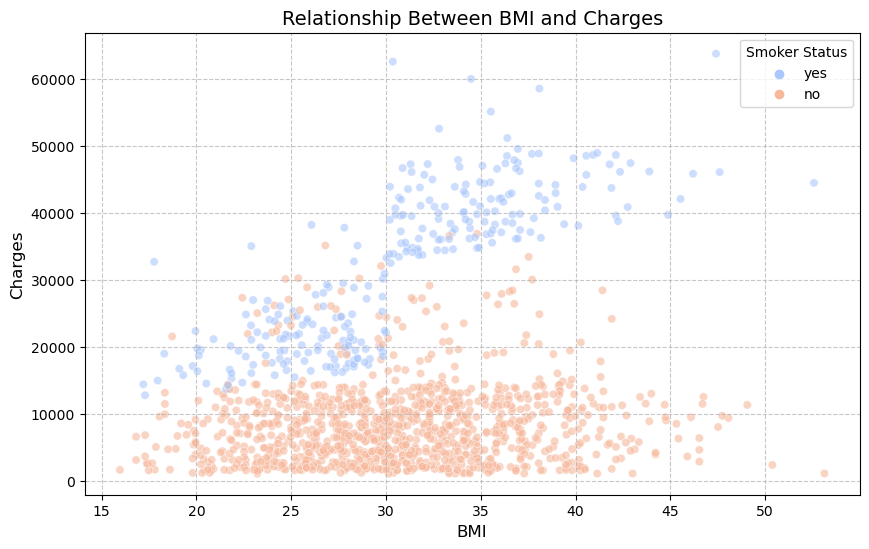

In [61]:
import seaborn as sns
from scipy.stats import pearsonr

# Plotting Charges vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='bmi', y='charges', hue='smoker', palette='coolwarm', alpha=0.6)
plt.title('Relationship Between BMI and Charges', fontsize=14)
plt.xlabel('BMI', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Smoker Status')
plt.show()

In [62]:
# Calculate Pearson correlation coefficient using cleaned data
correlation, p_value = pearsonr(data_cleaned['bmi'], data_cleaned['charges'])
print(f"Pearson Correlation Coefficient between BMI and Charges: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient between BMI and Charges: 0.20
P-value: 0.0000


### Bivariate Analysis
#### Two Categorical Variables:

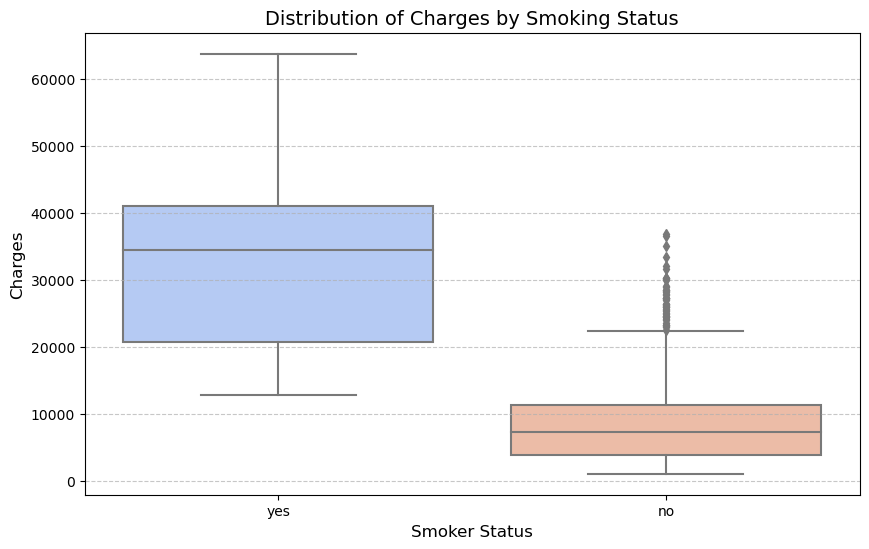

In [63]:
# Charges by Smoking Status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='smoker', y='charges', palette='coolwarm')
plt.title('Distribution of Charges by Smoking Status', fontsize=14)
plt.xlabel('Smoker Status', fontsize=12)
plt.ylabel('Charges', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [64]:
# 3. Categorical Variables: Relationship Between 'sex' and 'smoker'
cross_tab = pd.crosstab(data_cleaned['sex'], data_cleaned['smoker'])
print("Cross-tabulation of Sex and Smoker Status:")
print(cross_tab)

Cross-tabulation of Sex and Smoker Status:
smoker   no  yes
sex             
female  547  115
male    517  159


# Part II: Parametric Statistical Testing
### Research Question: Is there a statistically significant difference in medical charges between smokers and non-smokers?
Dependent Variable: `charges` (continuous)<br>
Independent Variable: `smoker` (categorical, two groups: yes/no)

#### Identify a parametric statistical test
##### We will use Welch's t-test because we are comparing the means of two independent groups (smokers vs non-smokers).

In [65]:
# D3: Separate charges based on smoking status
# Creating two groups: charges for smokers and non-smokers
charges_smoker = data_cleaned[data_cleaned['smoker'] == 'yes']['charges']
charges_non_smoker = data_cleaned[data_cleaned['smoker'] == 'no']['charges']

#### Define the hypotheses
-  Null hypothesis (H₀): There is no significant difference in mean charges between smokers and non-smokers.
- Alternative hypothesis (H₁): There is a significant difference in mean charges between smokers and non-smokers.

#### Run the parametric test (Welch's t-test)

In [66]:
# Perform Welch's t-test to compare the means
t_stat, p_value = ttest_ind(charges_smoker, charges_non_smoker, equal_var=False)

#### Print the results

In [67]:
# Display the test statistic and p-value
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 32.75
P-value: 0.0000


#### Interpret the results

In [68]:
# Make a decision based on the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference in charges between smokers and non-smokers.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference in charges between smokers and non-smokers.")

Reject the null hypothesis: There is a statistically significant difference in charges between smokers and non-smokers.


#### Discuss the answer to the research question

In [69]:
# Based on the test results, discuss whether smoking has a significant impact on medical charges
if p_value < 0.05:
    print("The analysis confirms that smokers have significantly higher medical charges compared to non-smokers.")
else:
    print("The analysis does not show a significant difference in medical charges between smokers and non-smokers.")

The analysis confirms that smokers have significantly higher medical charges compared to non-smokers.


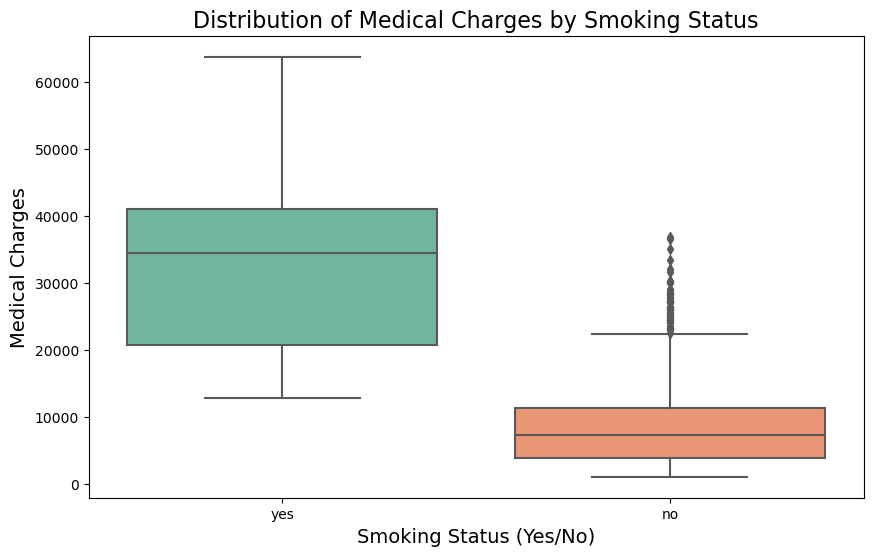

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot for charges grouped by smoker status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='smoker', y='charges', palette='Set2')

# Add titles and labels
plt.title('Distribution of Medical Charges by Smoking Status', fontsize=16)
plt.xlabel('Smoking Status (Yes/No)', fontsize=14)
plt.ylabel('Medical Charges', fontsize=14)

# Show the boxplot
plt.show()

# Part III: Nonparametric Statistical Testing

#### Group charges by region

In [71]:
# Step H: Separate the BMI values for each region
northeast_bmi = data_cleaned[data_cleaned['region'] == 'northeast']['bmi']
northwest_bmi = data_cleaned[data_cleaned['region'] == 'northwest']['bmi']
southeast_bmi = data_cleaned[data_cleaned['region'] == 'southeast']['bmi']
southwest_bmi = data_cleaned[data_cleaned['region'] == 'southwest']['bmi']

##### Identify a Nonparametric Statistical Test
- Kruskal-Wallis H Test is used to compare the medians across multiple groups (regions).

##### Define Null and Alternative Hypotheses
- Null Hypothesis (H₀): The median BMI of individuals is the same across all regions.
- Alternative Hypothesis (H₁): At least one region has a different median BMI.

#### Perform the Kruskal-Wallis H Test

In [72]:
# Compare the medians of charges across regions
from scipy.stats import kruskal
stat, p_value = kruskal(northeast_bmi, northwest_bmi, southeast_bmi, southwest_bmi)

#### Print the results

In [73]:
print("Step H4: Kruskal-Wallis Test Results")
print(f"Kruskal-Wallis Test Statistic: {stat:.2f}")
print(f"P-value: {p_value:.4f}")

Step H4: Kruskal-Wallis Test Results
Kruskal-Wallis Test Statistic: 94.69
P-value: 0.0000


#### Interpret the results

In [74]:
# Step I2: Interpret the results
print("\nStep I2: Interpretation of Results")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median BMI across regions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median BMI across regions.")


Step I2: Interpretation of Results
Reject the null hypothesis: There is a significant difference in median BMI across regions.


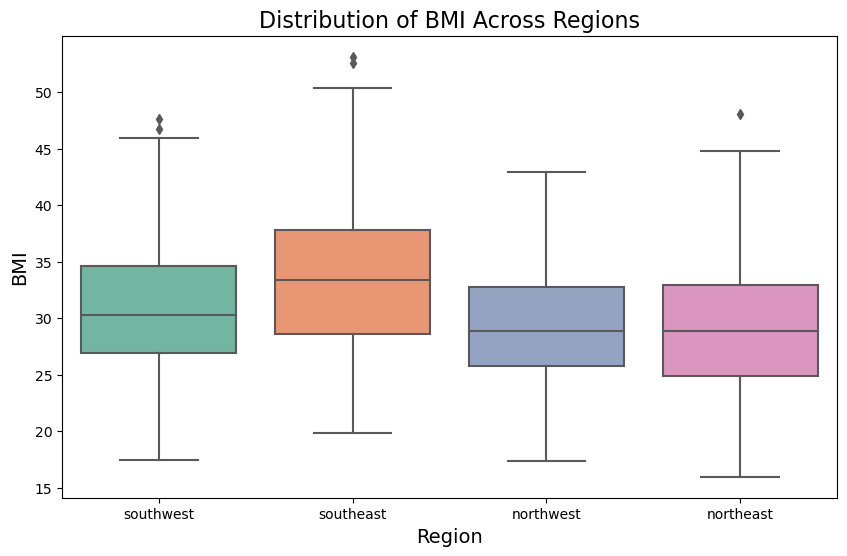

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for BMI across regions
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='region', y='bmi', palette='Set2')

# Titles and labels
plt.title('Distribution of BMI Across Regions', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('BMI', fontsize=14)

plt.show()
